In [1]:
import pickle

with open("results.pkl", 'rb') as f:
    results = pickle.load(f)

In [2]:
from typing import Tuple

def budget_graph_data(exp: str, adv_distance: bool = False):
  count = []
  total = []
  budgets = []
  for budget, budgetexps in sorted(results[exp].items()):
    count.append(0)
    total.append(0)
    budgets.append(budget)
    if exp == "trocr-diacriticals":
        for id, adv_example in budgetexps.items():
            if adv_distance:
                count[-1] += adv_example['adv_example_ocr_adv_distance']
            else:
                count[-1] += adv_example['adv_example_ocr_input_distance']
            total[-1] += 1
    elif exp == 'toxic-diacriticals':
        for rev_id, adv_example in budgetexps.items():
            if adv_example['adv_label_toxic']:
                count[-1] += 1
            total[-1] += 1
    elif exp == 'translation-diacriticals' or exp == 'visrep-diacriticals':
        for id, adv_example in budgetexps.items():
            count[-1] += adv_example['adv_chrf']
            total[-1] += 1
    elif exp == 'canine-diacriticals':
        for id, adv_example in budgetexps.items():
            count[-1] += adv_example['adv_f1']
            total[-1] += 1
  print(f"{exp} => {', '.join([f'{x}: {y}' for x,y in zip(budgets, total)])}")
  return budgets, list(map(lambda x,y: x/y, count, total))

def percentage(budget_data: Tuple[list,list]) -> Tuple[list,list]:
    pct = []
    for val in budget_data[1]:
        pct += [val/budget_data[1][0]]
    return budget_data[0], pct

trocr-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
trocr-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


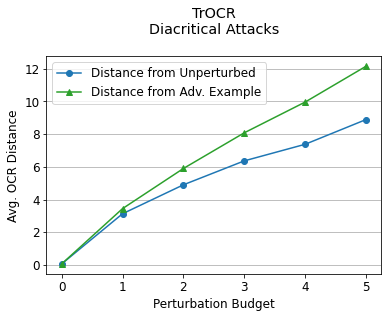

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 

plt.plot(*budget_graph_data('trocr-diacriticals', False), linestyle='-', marker='o', color="tab:blue", label="Distance from Unperturbed")
plt.plot(*budget_graph_data('trocr-diacriticals', True), linestyle='-', marker='^', color="tab:green", label="Distance from Adv. Example")

plt.xlabel("Perturbation Budget")
plt.ylabel("Avg. OCR Distance")
plt.title("TrOCR\nDiacritical Attacks\n")
plt.xticks(range(6))
plt.grid(axis='y')
plt.legend()
plt.savefig("trocr.pdf", bbox_inches='tight')
plt.show()

toxic-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


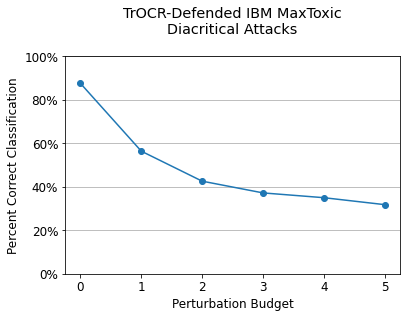

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 

plt.plot(*budget_graph_data('toxic-diacriticals'), linestyle='-', marker='o', color="tab:blue")

plt.xlabel("Perturbation Budget")
plt.ylabel("Percent Correct Classification")
plt.title("TrOCR-Defended IBM MaxToxic\nDiacritical Attacks\n")
plt.xticks(range(6))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.grid(axis='y')
plt.savefig("toxic.pdf", bbox_inches='tight')
plt.show()

translation-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


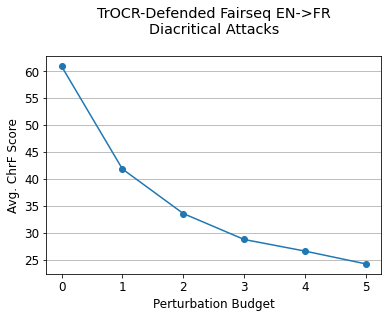

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 

plt.plot(*budget_graph_data('translation-diacriticals'), linestyle='-', marker='o', color="tab:blue")

plt.xlabel("Perturbation Budget")
plt.ylabel("Avg. ChrF Score")
plt.title("TrOCR-Defended Fairseq EN->FR\nDiacritical Attacks\n")
plt.xticks(range(6))
plt.grid(axis='y')
plt.savefig("translation.pdf", bbox_inches='tight')
plt.show()

visrep-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500


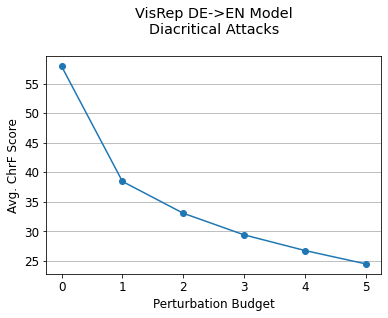

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 

plt.plot(*budget_graph_data('visrep-diacriticals'), linestyle='-', marker='o', color="tab:blue")

plt.xlabel("Perturbation Budget")
plt.ylabel("Avg. ChrF Score")
plt.title("VisRep DE->EN Model\nDiacritical Attacks\n")
plt.xticks(range(6))
plt.grid(axis='y')
plt.savefig("visrep.pdf", bbox_inches='tight')
plt.show()

canine-diacriticals => 0: 476, 1: 476, 2: 476, 3: 476, 4: 476, 5: 476


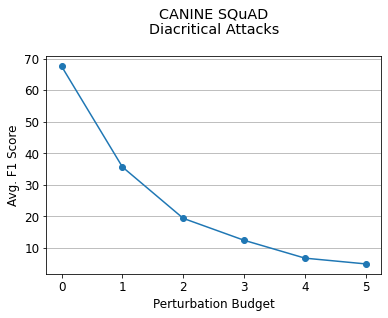

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 

plt.plot(*budget_graph_data('canine-diacriticals'), linestyle='-', marker='o', color="tab:blue")

plt.xlabel("Perturbation Budget")
plt.ylabel("Avg. F1 Score")
plt.title("CANINE SQuAD\nDiacritical Attacks\n")
plt.xticks(range(6))
plt.grid(axis='y')
plt.savefig("canine.pdf", bbox_inches='tight')
plt.show()

translation-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
toxic-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
visrep-diacriticals => 0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500
canine-diacriticals => 0: 476, 1: 476, 2: 476, 3: 476, 4: 476, 5: 476


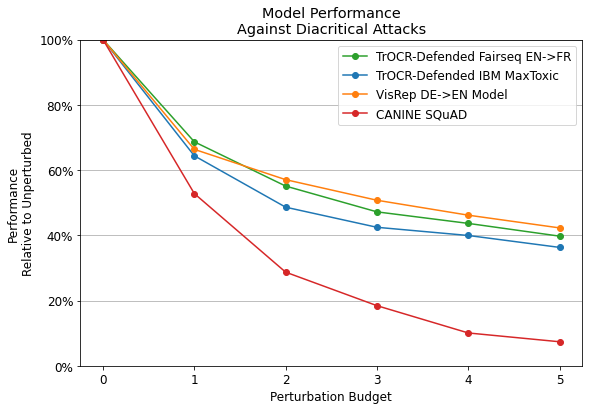

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.rc('font', size=12) 
plt.figure(figsize=(9,6))

plt.plot(*percentage(budget_graph_data('translation-diacriticals')), linestyle='-', marker='o', color="tab:green", label="TrOCR-Defended Fairseq EN->FR")
plt.plot(*percentage(budget_graph_data('toxic-diacriticals')), linestyle='-', marker='o', color="tab:blue", label="TrOCR-Defended IBM MaxToxic")
plt.plot(*percentage(budget_graph_data('visrep-diacriticals')), linestyle='-', marker='o', color="tab:orange", label="VisRep DE->EN Model")
plt.plot(*percentage(budget_graph_data('canine-diacriticals')), linestyle='-', marker='o', color="tab:red", label="CANINE SQuAD")

plt.xlabel("Perturbation Budget")
plt.ylabel("Performance\nRelative to Unperturbed")
plt.title("Model Performance\nAgainst Diacritical Attacks")
plt.xticks(range(6))
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.grid(axis='y')
plt.legend()
plt.savefig("evaluation.pdf", bbox_inches='tight')
plt.show()